<a href="https://colab.research.google.com/github/Wishmi-Sasika/MLOM-Labs/blob/main/MLOM_Practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive',
    target_size=(124, 124),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive',
    target_size=(124, 124),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

train_generator = train_datagen.flow_from_directory(
    '/your_dataset_directory',  # Replace with your actual dataset path
    target_size=(124, 124),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/your_dataset_directory',  # Replace with your actual dataset path
    target_size=(124, 124),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator( rescale=1.0 / 255, validation_split=0.2, )
#train_generator = train_datagen.flow_from_directory( '/your_dataset_directory', # Replace with your actual dataset path target_size=(124, 124), batch_size=16, class_mode='categorical', subset='training' )
#validation_generator = train_datagen.flow_from_directory( '/your_dataset_directory', # Replace with your actual dataset path target_size=(124, 124), batch_size=16, class_mode='categorical', subset='validation' )

from sklearn.model_selection import train_test_split

Assuming you have your dataset and labels
X, y = load_your_data()

Split the data into training and testing sets (80% - 20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#from sklearn.model_selection import train_test_split
#X, y = load_your_data()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_generator[0]

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
train_generator.image_shape

(124, 124, 3)

In [ ]:
validation_generator.image_shape

(124, 124, 3)

In [ ]:
model = keras.Sequential ([
    layers.Conv2D (2, (3, 3), activation = 'sigmoid', strides = 1, padding = 'valid', input_shape = (124, 124, 3)),
    layers.MaxPool2D (2, 2),

    layers.Conv2D (2, (3, 3), activation = 'relu', strides = 1),
    layers.MaxPool2D (2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense (50, activation = 'relu'),
    tf.keras.layers.Dense (5, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 122, 122, 2)       56        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 2)         38        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 2)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1682)              0         
                                                                 
 dense (Dense)               (None, 50)                8

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit (
    train_generator,
    validation_data = validation_generator,
    epochs = 50
)

Epoch 1/50
33/33 [==============================] - 154s 5s/step - loss: 1.9122 - accuracy: 0.2046 - val_loss: 1.6092 - val_accuracy: 0.2656
Epoch 2/50
33/33 [==============================] - 4s 115ms/step - loss: 1.6367 - accuracy: 0.2256 - val_loss: 1.5986 - val_accuracy: 0.3047
Epoch 3/50
33/33 [==============================] - 3s 76ms/step - loss: 1.6226 - accuracy: 0.2333 - val_loss: 1.5859 - val_accuracy: 0.2656
Epoch 4/50
33/33 [==============================] - 3s 77ms/step - loss: 1.6043 - accuracy: 0.2333 - val_loss: 1.5851 - val_accuracy: 0.2266
Epoch 5/50
33/33 [==============================] - 3s 76ms/step - loss: 1.5857 - accuracy: 0.2734 - val_loss: 1.5821 - val_accuracy: 0.2188
Epoch 6/50
33/33 [==============================] - 3s 75ms/step - loss: 1.6077 - accuracy: 0.2543 - val_loss: 1.6440 - val_accuracy: 0.2188
Epoch 7/50
33/33 [==============================] - 3s 77ms/step - loss: 1.5903 - accuracy: 0.2409 - val_loss: 1.5884 - val_accuracy: 0.2656
Epoch 8/50
3

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)

8/8 [==============================] - 0s 38ms/step - loss: 1.3361 - accuracy: 0.5703


In [ ]:
print ("Test loss : ", test_loss)
print ("Test accuracy : ", test_accuracy)

Test loss :  1.336079716682434
Test accuracy :  0.5703125


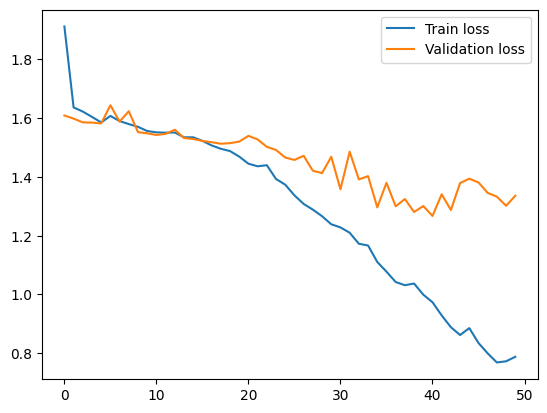

In [ ]:
plt.plot (history.history ['loss'], label = 'Train loss')
plt.plot (history.history ['val_loss'], label = 'Validation loss')
plt.legend()
plt.savefig ('Image.jpg')
plt.show()

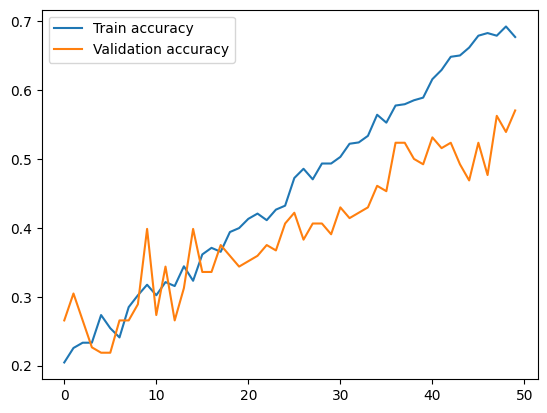

In [ ]:
plt.plot (history.history ['accuracy'], label = 'Train accuracy')
plt.plot (history.history ['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.savefig ('Image2.jpg')
plt.show()